In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

//anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
tit = pd.read_csv('/Users/madhavan/Desktop/titanic/data/train 10.38.35 AM.csv')

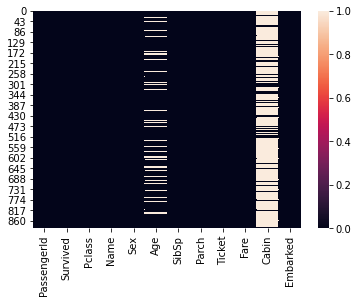

In [3]:
sns.heatmap(tit.isnull())

In [4]:
miss = tit.isnull().mean() * 100

In [5]:
tit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
pass_id = tit.pop('PassengerId')

In [7]:
miss = miss[miss > 0]
miss

Age         19.865320
Cabin       77.104377
Embarked     0.224467
dtype: float64

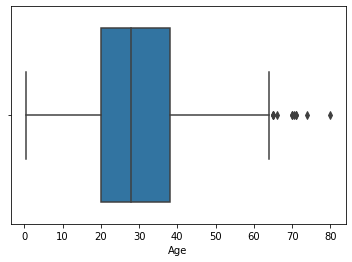

In [8]:
sns.boxplot(tit['Age'])

In [9]:
tit['Name_status'] = tit['Name'].map(lambda x:x.split()[1])

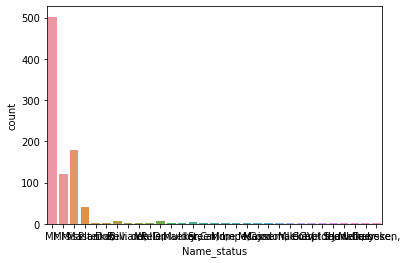

In [10]:
sns.countplot(tit['Name_status'])

In [11]:
tit['Name_status'][tit['Name_status'].isin(tit['Name_status'].value_counts()[4:].index)] = 'Other'

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
tit['star'] = tit['Ticket'].map(lambda x:x.split()[0])
tit['star'][tit['star'].map(lambda x:x.isnumeric())] = np.nan

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
tit['star'] = tit['star'].replace(np.nan, 'No Ticket Label')

In [14]:
tit = tit[tit.columns.difference(['Name'])]

In [15]:
tit['miss_info'] = tit.isnull().sum(axis = 1)

In [16]:
tit['Cabin_Alph'] = tit['Cabin'].dropna().map(lambda x:x.split()[0][0])

In [17]:
tit

,Age,Cabin,Embarked,Fare,Name_status,Parch,Pclass,Sex,SibSp,Survived,Ticket,star,miss_info,Cabin_Alph
0,22.0,NaN,S,7.2500,Mr.,0,3,male,1,0,A/5 21171,A/5,1,NaN
1,38.0,C85,C,71.2833,Mrs.,0,1,female,1,1,PC 17599,PC,0,C
2,26.0,NaN,S,7.9250,Miss.,0,3,female,0,1,STON/O2. 3101282,STON/O2.,1,NaN
3,35.0,C123,S,53.1000,Mrs.,0,1,female,1,1,113803,No Ticket Label,0,C
4,35.0,NaN,S,8.0500,Mr.,0,3,male,0,0,373450,No Ticket Label,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,NaN,S,13.0000,Other,0,2,male,0,0,211536,No Ticket Label,1,NaN
887,19.0,B42,S,30.0000,Miss.,0,1,female,0,1,112053,No Ticket Label,0,B
888,NaN,NaN,S,23.4500,Miss.,2,3,female,1,0,W./C. 6607,W./C.,2,NaN
889,26.0,C148,C,30.0000,Mr.,0,1,male,0,1,111369,No Ticket Label,0,C


In [18]:
tit['Cabin_Alph']

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: Cabin_Alph, Length: 891, dtype: object

Text(0.5, 0.98, '% DISTRIBUTION OF CATEGORIES ACROSS CONVERTED ( TARGET VARIABLE)')

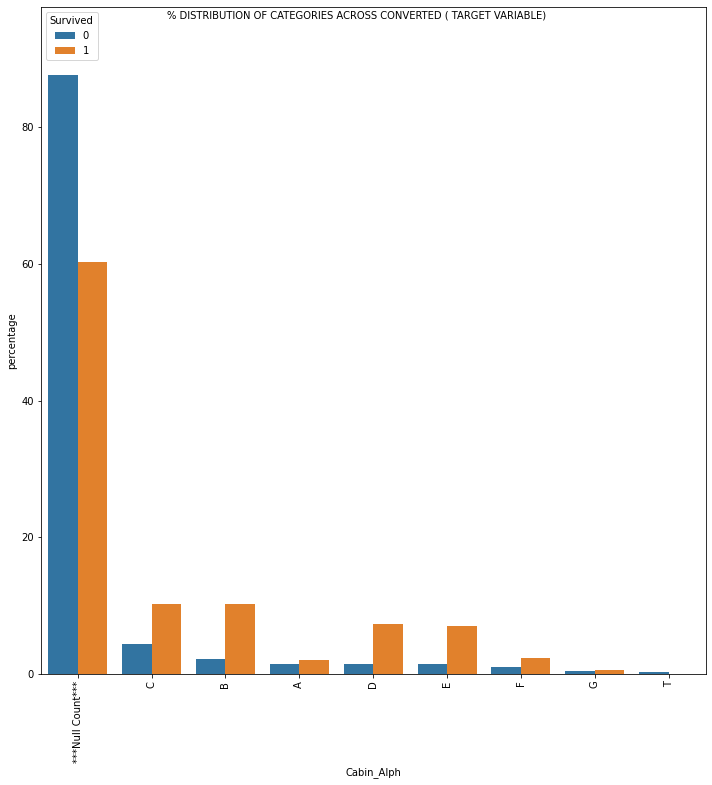

In [19]:
c = 1

plt.figure(figsize = (10,10))
for x in ['Cabin_Alph']: #consisting categorical column
        
        # grouping data based on Target column i.e Converted , counting values, converting into % and then plotting it
        
        ccu = tit.replace(np.nan,'***Null Count***').groupby(['Survived'])[x].value_counts(normalize = True).rename('percentage').mul(100).reset_index()
        sns.barplot(y = 'percentage' ,x = x,data = ccu,hue = 'Survived')
        plt.ylim(0,ccu['percentage'].max() + 10)
        plt.tight_layout()
        plt.xticks(rotation = 90) #rotating for easy visibility
        c += 1
        
plt.subplots_adjust(hspace= 0.5)
plt.suptitle('% DISTRIBUTION OF CATEGORIES ACROSS CONVERTED ( TARGET VARIABLE)' , size = 10)

In [20]:
tit['Cabin_Alph'] = tit['Cabin_Alph'].replace(np.nan,'Cabin Not Alloted')

In [21]:
tit['Age_bins'] = pd.qcut(tit['Age'], q = 10 )

Text(0.5, 0.98, '% DISTRIBUTION OF CATEGORIES ACROSS CONVERTED ( TARGET VARIABLE)')

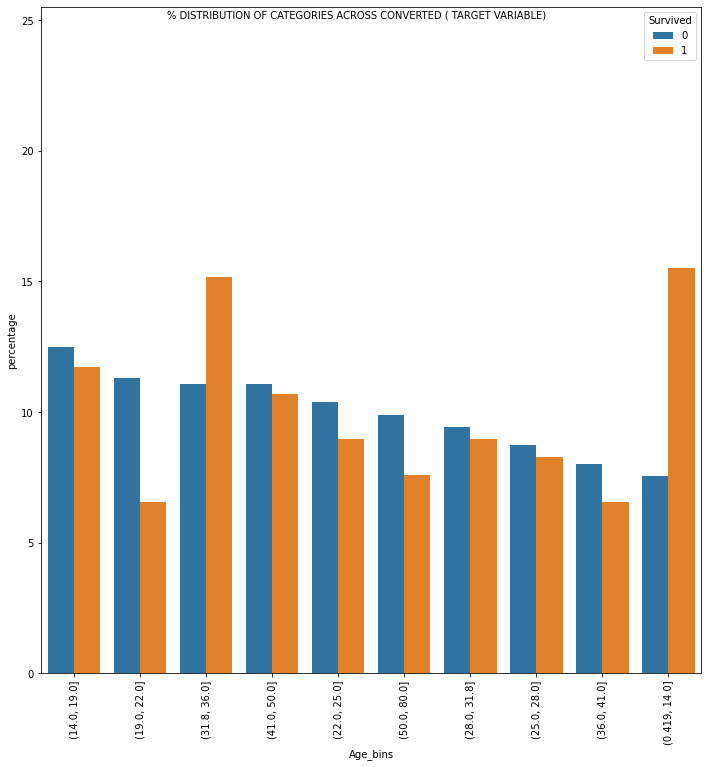

In [22]:
c = 1

plt.figure(figsize = (10,10))
for x in ['Age_bins']: #consisting categorical column
        
        # grouping data based on Target column i.e Converted , counting values, converting into % and then plotting it
        
        ccu = tit.replace(np.nan,'***Null Count***').groupby(['Survived'])[x].value_counts(normalize = True).rename('percentage').mul(100).reset_index()
        sns.barplot(y = 'percentage' ,x = x,data = ccu,hue = 'Survived')
        plt.ylim(0,ccu['percentage'].max() + 10)
        plt.tight_layout()
        plt.xticks(rotation = 90) #rotating for easy visibility
        c += 1
        
plt.subplots_adjust(hspace= 0.5)
plt.suptitle('% DISTRIBUTION OF CATEGORIES ACROSS CONVERTED ( TARGET VARIABLE)' , size = 10)

In [23]:
tit['Age_bins'] = tit['Age_bins'].replace(np.nan,'Not_given')

In [24]:
tit = tit[tit.columns.difference(['Age'])]

In [25]:
tit

,Age_bins,Cabin,Cabin_Alph,Embarked,Fare,Name_status,Parch,Pclass,Sex,SibSp,Survived,Ticket,miss_info,star
0,"(19.0, 22.0]",NaN,Cabin Not Alloted,S,7.2500,Mr.,0,3,male,1,0,A/5 21171,1,A/5
1,"(36.0, 41.0]",C85,C,C,71.2833,Mrs.,0,1,female,1,1,PC 17599,0,PC
2,"(25.0, 28.0]",NaN,Cabin Not Alloted,S,7.9250,Miss.,0,3,female,0,1,STON/O2. 3101282,1,STON/O2.
3,"(31.8, 36.0]",C123,C,S,53.1000,Mrs.,0,1,female,1,1,113803,0,No Ticket Label
4,"(31.8, 36.0]",NaN,Cabin Not Alloted,S,8.0500,Mr.,0,3,male,0,0,373450,1,No Ticket Label
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,"(25.0, 28.0]",NaN,Cabin Not Alloted,S,13.0000,Other,0,2,male,0,0,211536,1,No Ticket Label
887,"(14.0, 19.0]",B42,B,S,30.0000,Miss.,0,1,female,0,1,112053,0,No Ticket Label
888,NaN,NaN,Cabin Not Alloted,S,23.4500,Miss.,2,3,female,1,0,W./C. 6607,2,W./C.
889,"(25.0, 28.0]",C148,C,C,30.0000,Mr.,0,1,male,0,1,111369,0,No Ticket Label


Text(0.5, 0.98, '% DISTRIBUTION OF CATEGORIES ACROSS CONVERTED ( TARGET VARIABLE)')

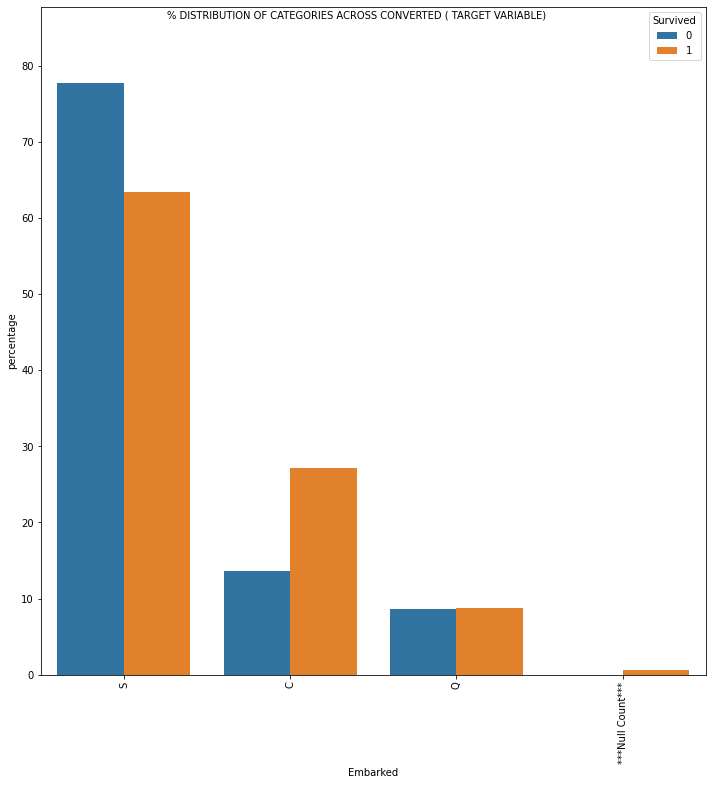

In [26]:
c = 1

plt.figure(figsize = (10,10))
for x in ['Embarked']: #consisting categorical column
        
        # grouping data based on Target column i.e Converted , counting values, converting into % and then plotting it
        
        ccu = tit.replace(np.nan,'***Null Count***').groupby(['Survived'])[x].value_counts(normalize = True).rename('percentage').mul(100).reset_index()
        sns.barplot(y = 'percentage' ,x = x,data = ccu,hue = 'Survived')
        plt.ylim(0,ccu['percentage'].max() + 10)
        plt.tight_layout()
        plt.xticks(rotation = 90) #rotating for easy visibility
        c += 1
        
plt.subplots_adjust(hspace= 0.5)
plt.suptitle('% DISTRIBUTION OF CATEGORIES ACROSS CONVERTED ( TARGET VARIABLE)' , size = 10)

In [27]:
tit = tit[tit.columns.difference(['Cabin','Ticket'])]

In [28]:
tit.select_dtypes('object').columns

Index(['Cabin_Alph', 'Embarked', 'Name_status', 'Sex', 'star'], dtype='object')

Text(0.5, 0.98, '% DISTRIBUTION OF CATEGORIES ACROSS CONVERTED ( TARGET VARIABLE)')

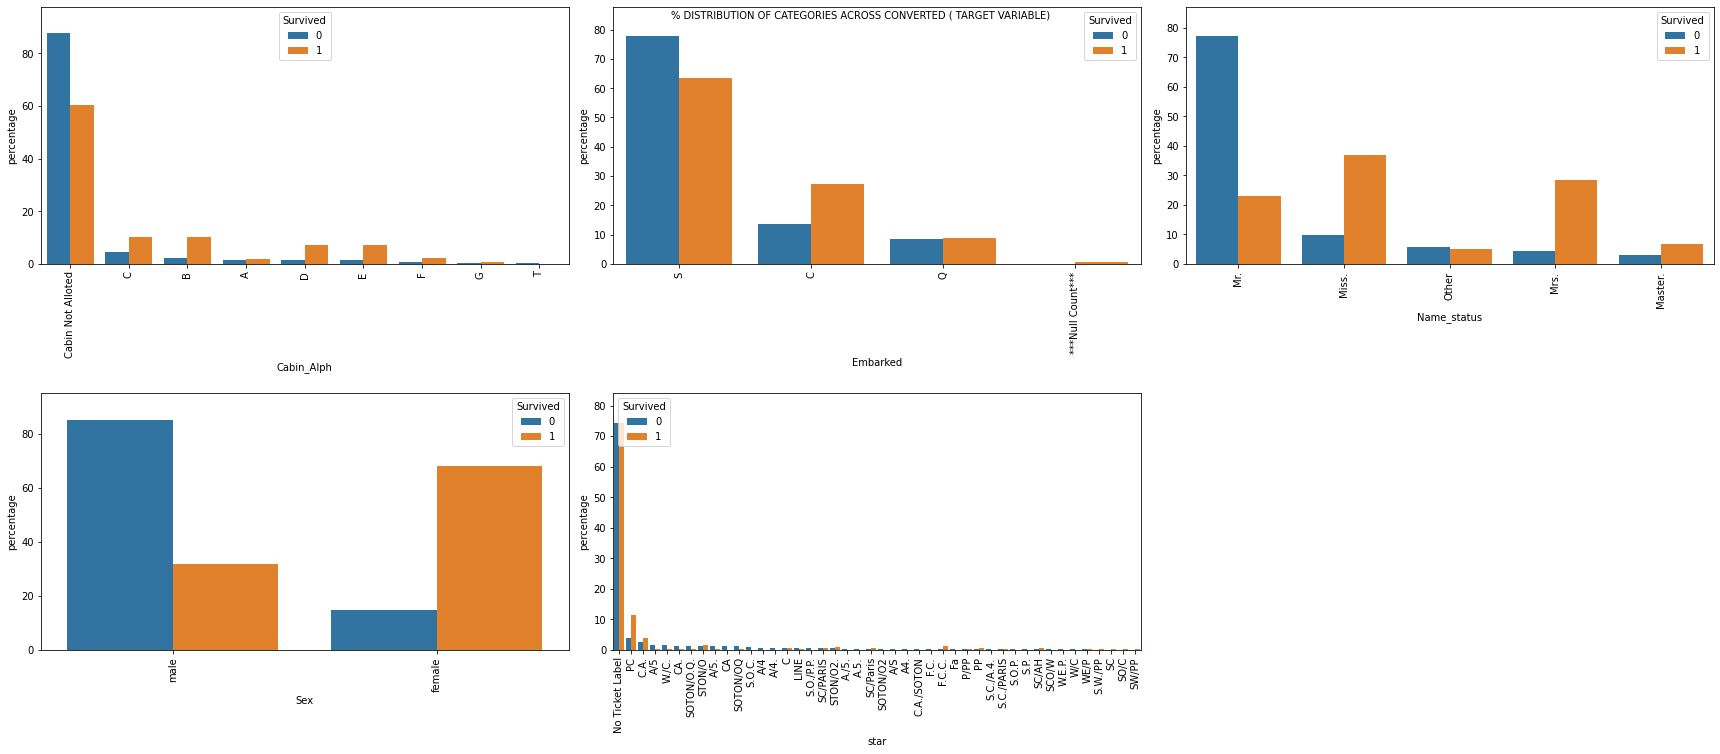

In [29]:
c = 1

plt.figure(figsize = (24,10))
for x in tit.select_dtypes('object').columns: #consisting categorical column
        plt.subplot(2,3,c)
        # grouping data based on Target column i.e Converted , counting values, converting into % and then plotting it
        
        ccu = tit.replace(np.nan,'***Null Count***').groupby(['Survived'])[x].value_counts(normalize = True).rename('percentage').mul(100).reset_index()
        sns.barplot(y = 'percentage' ,x = x,data = ccu,hue = 'Survived')
        plt.ylim(0,ccu['percentage'].max() + 10)
        plt.tight_layout()
        plt.xticks(rotation = 90) #rotating for easy visibility
        c += 1
        
plt.subplots_adjust(hspace= 0.5)
plt.suptitle('% DISTRIBUTION OF CATEGORIES ACROSS CONVERTED ( TARGET VARIABLE)' , size = 10)

In [30]:
tit['star'].value_counts()[2:]

C.A.          27
STON/O        12
A/5           10
W./C.          9
CA.            8
SOTON/O.Q.     8
SOTON/OQ       7
A/5.           7
STON/O2.       6
CA             6
S.O.C.         5
F.C.C.         5
C              5
SC/PARIS       5
LINE           4
SC/Paris       4
A/4.           3
PP             3
A/4            3
S.O./P.P.      3
SC/AH          3
A./5.          2
A.5.           2
WE/P           2
S.C./PARIS     2
SOTON/O2       2
P/PP           2
S.P.           1
F.C.           1
C.A./SOTON     1
S.O.P.         1
S.W./PP        1
A4.            1
Fa             1
W/C            1
W.E.P.         1
A/S            1
SW/PP          1
SO/C           1
S.C./A.4.      1
SC             1
SCO/W          1
Name: star, dtype: int64

In [31]:
tit['star'][tit['star'].isin(tit['star'].value_counts()[2:].index)] = 'Other'

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
//anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [32]:
tit['Cabin_Alph'].value_counts()[5:]

A    15
F    13
G     4
T     1
Name: Cabin_Alph, dtype: int64

In [33]:
tit['Cabin_Alph'][tit['Cabin_Alph'].isin(tit['Cabin_Alph'].value_counts()[5:].index)] = 'A_F_G_T'

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
tit

,Age_bins,Cabin_Alph,Embarked,Fare,Name_status,Parch,Pclass,Sex,SibSp,Survived,miss_info,star
0,"(19.0, 22.0]",Cabin Not Alloted,S,7.2500,Mr.,0,3,male,1,0,1,Other
1,"(36.0, 41.0]",C,C,71.2833,Mrs.,0,1,female,1,1,0,PC
2,"(25.0, 28.0]",Cabin Not Alloted,S,7.9250,Miss.,0,3,female,0,1,1,Other
3,"(31.8, 36.0]",C,S,53.1000,Mrs.,0,1,female,1,1,0,No Ticket Label
4,"(31.8, 36.0]",Cabin Not Alloted,S,8.0500,Mr.,0,3,male,0,0,1,No Ticket Label
...,...,...,...,...,...,...,...,...,...,...,...,...
886,"(25.0, 28.0]",Cabin Not Alloted,S,13.0000,Other,0,2,male,0,0,1,No Ticket Label
887,"(14.0, 19.0]",B,S,30.0000,Miss.,0,1,female,0,1,0,No Ticket Label
888,NaN,Cabin Not Alloted,S,23.4500,Miss.,2,3,female,1,0,2,Other
889,"(25.0, 28.0]",C,C,30.0000,Mr.,0,1,male,0,1,0,No Ticket Label


Text(0.5, 0.98, '% DISTRIBUTION OF CATEGORIES ACROSS CONVERTED ( TARGET VARIABLE)')

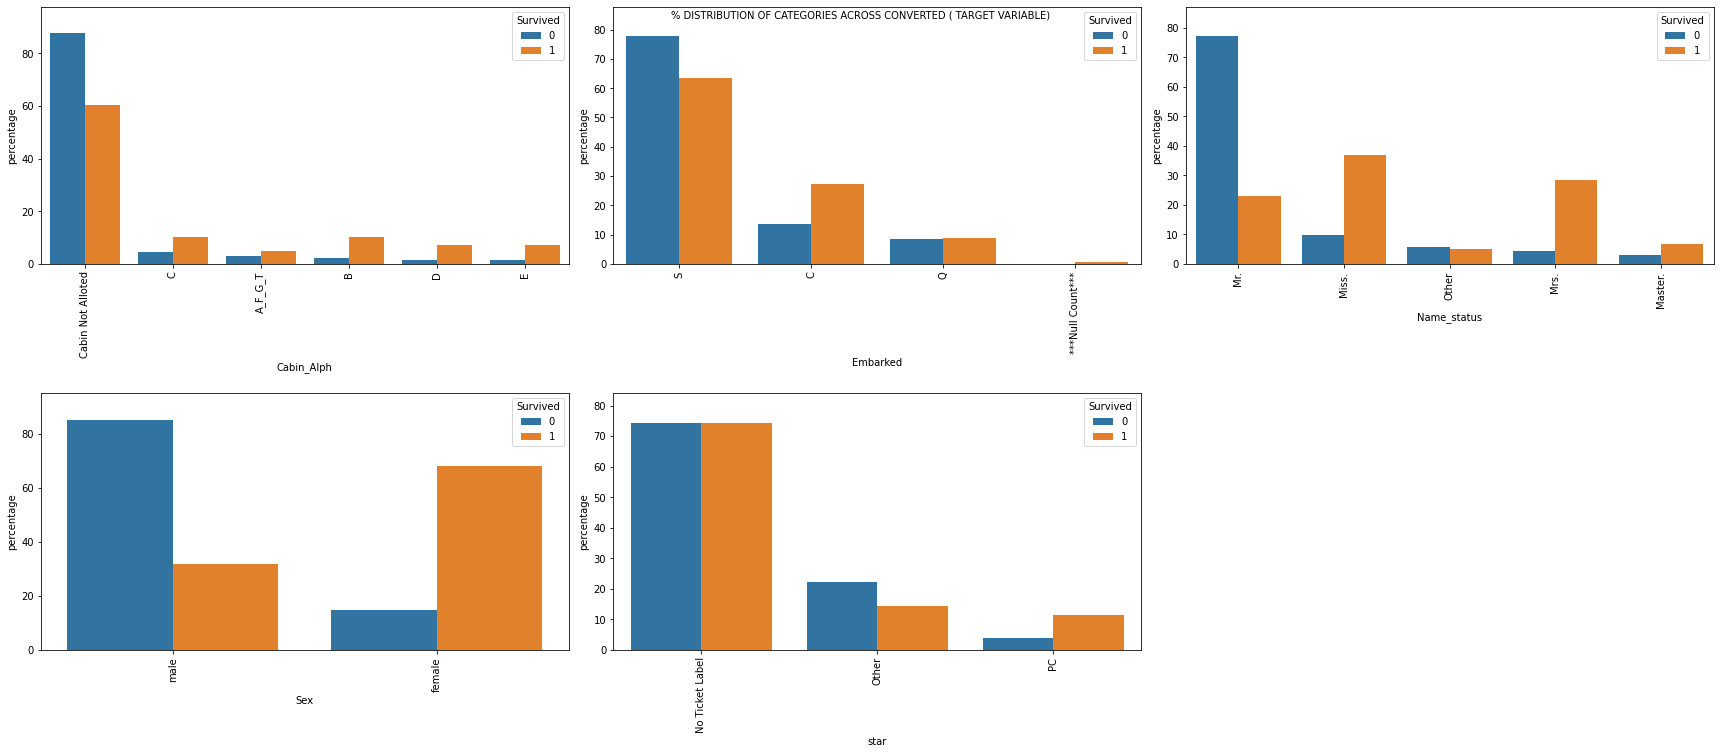

In [35]:
c = 1

plt.figure(figsize = (24,10))
for x in tit.select_dtypes('object').columns: #consisting categorical column
        plt.subplot(2,3,c)
        # grouping data based on Target column i.e Converted , counting values, converting into % and then plotting it
        
        ccu = tit.replace(np.nan,'***Null Count***').groupby(['Survived'])[x].value_counts(normalize = True).rename('percentage').mul(100).reset_index()
        sns.barplot(y = 'percentage' ,x = x,data = ccu,hue = 'Survived')
        plt.ylim(0,ccu['percentage'].max() + 10)
        plt.tight_layout()
        plt.xticks(rotation = 90) #rotating for easy visibility
        c += 1
        
plt.subplots_adjust(hspace= 0.5)
plt.suptitle('% DISTRIBUTION OF CATEGORIES ACROSS CONVERTED ( TARGET VARIABLE)' , size = 10)

In [36]:
tit['Embarked'][tit['Embarked'].isna()] = 'C'

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
//anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [39]:
tit.to_csv('train_ready.csv')

In [37]:
import copy
for_mod = copy.deepcopy(tit)

In [80]:
for_mod['Fare'] = np.log(for_mod['Fare'] + 1)

In [81]:
dum = pd.get_dummies(for_mod.select_dtypes([object])) #creating dummies

for x in for_mod.select_dtypes([object]).columns: #selecting original columns
    del dum[dum.filter(like = x).sum().sort_values().index[0]] #removing sub-categories under each category where sum is minimal
    del for_mod[x] #deleting the orginal column

dum

,"Age_bins_(0.419, 14.0]","Age_bins_(14.0, 19.0]","Age_bins_(19.0, 22.0]","Age_bins_(22.0, 25.0]","Age_bins_(25.0, 28.0]","Age_bins_(28.0, 31.8]","Age_bins_(31.8, 36.0]","Age_bins_(41.0, 50.0]","Age_bins_(50.0, 80.0]",Age_bins_Not_given,...,Cabin_Alph_D,Embarked_C,Embarked_S,Name_status_Miss.,Name_status_Mr.,Name_status_Mrs.,Name_status_Other,Sex_male,star_No Ticket Label,star_Other
0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
3,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,1,1,0
887,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
888,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,0,1
889,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,1,0


In [82]:
dum.columns

Index(['Age_bins_(0.419, 14.0]', 'Age_bins_(14.0, 19.0]',
       'Age_bins_(19.0, 22.0]', 'Age_bins_(22.0, 25.0]',
       'Age_bins_(25.0, 28.0]', 'Age_bins_(28.0, 31.8]',
       'Age_bins_(31.8, 36.0]', 'Age_bins_(41.0, 50.0]',
       'Age_bins_(50.0, 80.0]', 'Age_bins_Not_given', 'Cabin_Alph_A_F_G_T',
       'Cabin_Alph_B', 'Cabin_Alph_C', 'Cabin_Alph_Cabin Not Alloted',
       'Cabin_Alph_D', 'Embarked_C', 'Embarked_S', 'Name_status_Miss.',
       'Name_status_Mr.', 'Name_status_Mrs.', 'Name_status_Other', 'Sex_male',
       'star_No Ticket Label', 'star_Other'],
      dtype='object')

In [83]:
for_mod[dum.columns] = dum
for_mod.head()

,Fare,Parch,Pclass,SibSp,Survived,miss_info,"Age_bins_(0.419, 14.0]","Age_bins_(14.0, 19.0]","Age_bins_(19.0, 22.0]","Age_bins_(22.0, 25.0]",...,Cabin_Alph_D,Embarked_C,Embarked_S,Name_status_Miss.,Name_status_Mr.,Name_status_Mrs.,Name_status_Other,Sex_male,star_No Ticket Label,star_Other
0,2.110213,0,3,1,0,1,0,0,1,0,...,0,0,1,0,1,0,0,1,0,1
1,4.280593,0,1,1,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,2.188856,0,3,0,1,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
3,3.990834,0,1,1,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
4,2.202765,0,3,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,1,1,0


In [84]:
for_mod.columns

Index(['Fare', 'Parch', 'Pclass', 'SibSp', 'Survived', 'miss_info',
       'Age_bins_(0.419, 14.0]', 'Age_bins_(14.0, 19.0]',
       'Age_bins_(19.0, 22.0]', 'Age_bins_(22.0, 25.0]',
       'Age_bins_(25.0, 28.0]', 'Age_bins_(28.0, 31.8]',
       'Age_bins_(31.8, 36.0]', 'Age_bins_(41.0, 50.0]',
       'Age_bins_(50.0, 80.0]', 'Age_bins_Not_given', 'Cabin_Alph_A_F_G_T',
       'Cabin_Alph_B', 'Cabin_Alph_C', 'Cabin_Alph_Cabin Not Alloted',
       'Cabin_Alph_D', 'Embarked_C', 'Embarked_S', 'Name_status_Miss.',
       'Name_status_Mr.', 'Name_status_Mrs.', 'Name_status_Other', 'Sex_male',
       'star_No Ticket Label', 'star_Other'],
      dtype='object')

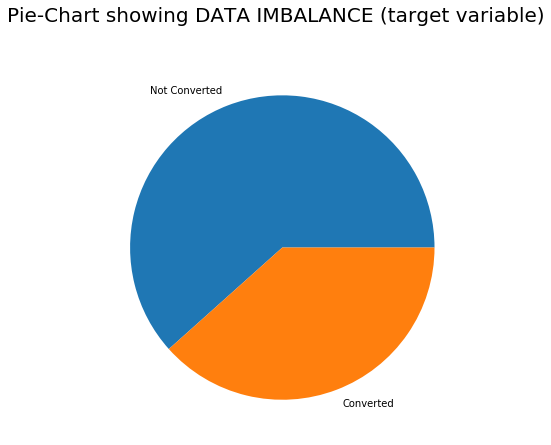

In [85]:
plt.figure(figsize = (7,7))
plt.pie(for_mod['Survived'].value_counts() , labels = ['Not Converted','Converted'])
plt.suptitle('Pie-Chart showing DATA IMBALANCE (target variable)' , size = 20 )
plt.subplots_adjust(hspace= 0.5)

In [86]:
y = for_mod.pop('Survived')
X = for_mod

In [87]:
X['Pass_Id'] = pass_id
X

,Fare,Parch,Pclass,SibSp,miss_info,"Age_bins_(0.419, 14.0]","Age_bins_(14.0, 19.0]","Age_bins_(19.0, 22.0]","Age_bins_(22.0, 25.0]","Age_bins_(25.0, 28.0]",...,Embarked_C,Embarked_S,Name_status_Miss.,Name_status_Mr.,Name_status_Mrs.,Name_status_Other,Sex_male,star_No Ticket Label,star_Other,Pass_Id
0,2.110213,0,3,1,1,0,0,1,0,0,...,0,1,0,1,0,0,1,0,1,1
1,4.280593,0,1,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,2
2,2.188856,0,3,0,1,0,0,0,0,1,...,0,1,1,0,0,0,0,0,1,3
3,3.990834,0,1,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,4
4,2.202765,0,3,0,1,0,0,0,0,0,...,0,1,0,1,0,0,1,1,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2.639057,0,2,0,1,0,0,0,0,1,...,0,1,0,0,0,1,1,1,0,887
887,3.433987,0,1,0,0,0,1,0,0,0,...,0,1,1,0,0,0,0,1,0,888
888,3.196630,2,3,1,2,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,889
889,3.433987,0,1,0,0,0,0,0,0,1,...,1,0,0,1,0,0,1,1,0,890


In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)
pass_id_train = X_train.pop('Pass_Id')  #number assigned to each lead
pass_id_test = X_test.pop('Pass_Id')

In [89]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [90]:
X_train[X_train.columns] = scaler.fit_transform(X_train)
X_train

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
//anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Fare,Parch,Pclass,SibSp,miss_info,"Age_bins_(0.419, 14.0]","Age_bins_(14.0, 19.0]","Age_bins_(19.0, 22.0]","Age_bins_(22.0, 25.0]","Age_bins_(25.0, 28.0]",...,Cabin_Alph_D,Embarked_C,Embarked_S,Name_status_Miss.,Name_status_Mr.,Name_status_Mrs.,Name_status_Other,Sex_male,star_No Ticket Label,star_Other
408,0.348011,0.0,1.0,0.000,0.5,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
480,0.619959,0.4,1.0,0.625,0.5,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
510,0.347554,0.0,1.0,0.000,0.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
609,0.807566,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
547,0.432443,0.0,0.5,0.000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,0.374462,0.2,1.0,0.000,0.5,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
871,0.637838,0.2,0.0,0.125,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
835,0.710264,0.2,0.0,0.125,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
792,0.682003,0.4,1.0,1.000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [91]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()) #learning the co-efficients
model_1 = logm1.fit() #fitting the model
model_1.summary()

//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  712
Model:                            GLM   Df Residuals:                      682
Model Family:                Binomial   Df Model:                           29
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -273.42
Date:                Wed, 03 Jun 2020   Deviance:                       546.84
Time:                        20:56:17   Pearson chi2:                     732.
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            4.3025      1.676      2.567      0.010       1.018       7.587
Fare                             2.8061      1.364      2.058      0.040       0.133       5.479
Parch                           -2.7677      0.898     -3.083      0.002      -4.527      -1.008
Pclass                          -1.5173      0.493     -3.078      0.002      -2.484      -0.551
SibSp                           -4.4831      1.215     -3.691      0.000      -6.864      -2.102
miss_info                       33.2439   2.51e+04      0.001      0.999   -4.91e+04    4.92e+04
Age_bins_(0.419, 14.0]           1.0688      0.721      1.483      0.138      -0.344       2.481
Age_bins_(14.0, 19.0]            0.6429      0.633      1.016      0.309      -0.597       1.883
Age_bins_(19.0, 22.0]           -0.0247      0.705     -0.035      0.972      -1.406       1.357
Age_bins_(22.0, 25.0]            0.2638      0.644      0.410      0.682      -0.999       1.527
Age_bins_(25.0, 28.0]            0.5546      0.661      0.839      0.402      -0.742       1.851
Age_bins_(28.0, 31.8]            0.3791      0.646      0.586      0.558      -0.888       1.646
Age_bins_(31.8, 36.0]            1.1637      0.623      1.869      0.062      -0.057       2.384
Age_bins_(41.0, 50.0]           -0.1294      0.617     -0.210      0.834      -1.338       1.079
Age_bins_(50.0, 80.0]           -0.6031      0.668     -0.903      0.367      -1.912       0.706
Age_bins_Not_given             -16.4677   1.25e+04     -0.001      0.999   -2.46e+04    2.46e+04
Cabin_Alph_A_F_G_T              -0.8718      0.726     -1.200      0.230      -2.296       0.552
Cabin_Alph_B                    -0.6611      0.706     -0.936      0.349      -2.045       0.723
Cabin_Alph_C                    -1.3565      0.663     -2.046      0.041      -2.656      -0.057
Cabin_Alph_Cabin Not Alloted   -17.9940   1.25e+04     -0.001      0.999   -2.46e+04    2.45e+04
Cabin_Alph_D                    -0.2551      0.737     -0.346      0.729      -1.699       1.189
Embarked_C                       0.2142      0.497      0.431      0.666      -0.759       1.188
Embarked_S                      -0.4241      0.440     -0.964      0.335      -1.286       0.438
Name_status_Miss.               -2.8049      1.102     -2.546      0.011      -4.964      -0.646
Name_status_Mr.                 -3.6095      0.671     -5.381      0.000      -4.924      -2.295
Name_status_Mrs.                -2.2674      1.162     -1.952      0.051      -4.545       0.010
Name_status_Other               -3.5470      0.837     -4.236      0.000      -5.188      -1.906
Sex_male                        -2.4470      0.893     -2.739      0.006      -4.198      -0.696
star_No Ticket Label             0.9505      0.517      1.839      0.066    

In [92]:
y_train_pred = model_1.predict(X_train_sm).values   

In [93]:
y_train_pred_df = pd.DataFrame({'Actual':y_train, 'Pred_Prob':y_train_pred})
y_train_pred_df['Pass_id'] = pass_id_train
y_train_pred_df.head()

,Actual,Pred_Prob,Pass_id
408,0,0.040498,409
480,0,0.214680,481
510,1,0.087974,511
609,1,0.879010,610
547,1,0.273160,548


In [94]:
from sklearn import metrics

In [95]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [96]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_df['Actual'], y_train_pred_df['Pred_Prob'], drop_intermediate = False )

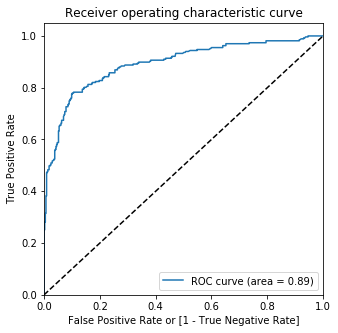

In [97]:
draw_roc( y_train_pred_df['Actual'],y_train_pred_df['Pred_Prob'])

In [98]:
numbers = [float(x)/10 for x in range(10)] # 0.1 to 0.10
for i in numbers:
    y_train_pred_df[i]= y_train_pred_df['Pred_Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_df.head()

,Actual,Pred_Prob,Pass_id,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
408,0,0.040498,409,1,0,0,0,0,0,0,0,0,0
480,0,0.214680,481,1,1,1,0,0,0,0,0,0,0
510,1,0.087974,511,1,0,0,0,0,0,0,0,0,0
609,1,0.879010,610,1,1,1,1,1,1,1,1,1,0
547,1,0.273160,548,1,1,1,0,0,0,0,0,0,0


In [99]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

num = [float(x)/10 for x in range(10)]
for i in num:
    cm = metrics.confusion_matrix(y_train_pred_df['Actual'], y_train_pred_df[i] )
    total =sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    
    specificity = cm[0,0]/(cm[0,0]+cm[0,1])
    sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
cutoff_df

,prob,accuracy,sensitivity,specificity
0.0,0.0,0.375000,1.000000,0.000000
0.1,0.1,0.678371,0.932584,0.525843
0.2,0.2,0.766854,0.887640,0.694382
0.3,0.3,0.806180,0.838951,0.786517
0.4,0.4,0.831461,0.812734,0.842697
0.5,0.5,0.852528,0.782772,0.894382
0.6,0.6,0.848315,0.726592,0.921348
0.7,0.7,0.810393,0.565543,0.957303
0.8,0.8,0.794944,0.471910,0.988764
0.9,0.9,0.737360,0.307116,0.995506


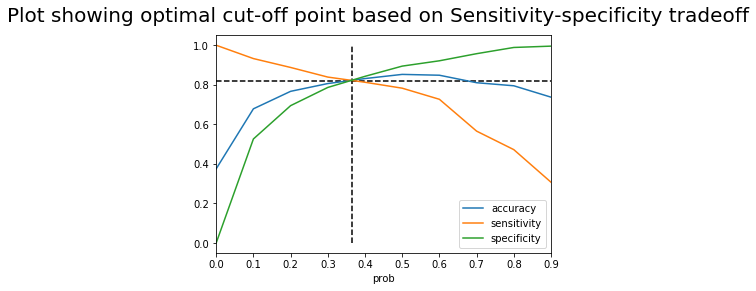

In [105]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.vlines(x=0.365, ymax=1, ymin=0, colors="k", linestyles="--")
plt.hlines(y = 0.82,xmax=1, xmin=0, colors="k", linestyles="--")
plt.suptitle('Plot showing optimal cut-off point based on Sensitivity-specificity tradeoff' , size = 20 )
plt.subplots_adjust(hspace= 0.5)

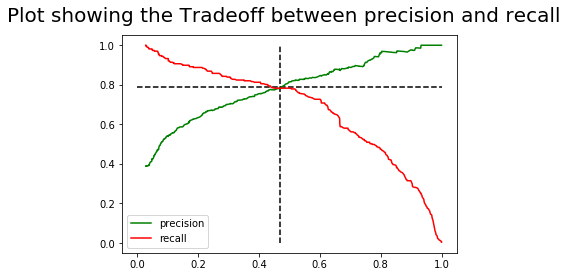

In [109]:
from sklearn.metrics import precision_recall_curve

p, r, thresholds = precision_recall_curve(y_train_pred_df['Actual'], y_train_pred_df['Pred_Prob'])

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.legend(['precision','recall'])
plt.vlines(x=0.47, ymax=1, ymin=0, colors="k", linestyles="--")
plt.hlines(y = 0.79,xmax=1, xmin=0, colors="k", linestyles="--")
plt.suptitle('Plot showing the Tradeoff between precision and recall' , size = 20 )
plt.subplots_adjust(hspace= 0.5)
plt.show()


In [110]:
y_train_pred_df['final_predicted'] = y_train_pred_df['Pred_Prob'].map( lambda x: 1 if x >= 0.365 else 0)

y_train_pred_df.head()

,Actual,Pred_Prob,Pass_id,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
408,0,0.040498,409,1,0,0,0,0,0,0,0,0,0,0
480,0,0.214680,481,1,1,1,0,0,0,0,0,0,0,0
510,1,0.087974,511,1,0,0,0,0,0,0,0,0,0,0
609,1,0.879010,610,1,1,1,1,1,1,1,1,1,0,1
547,1,0.273160,548,1,1,1,0,0,0,0,0,0,0,0


In [111]:
metrics.accuracy_score(y_train_pred_df['Actual'], y_train_pred_df['final_predicted'])

0.8230337078651685

In [112]:
X_test.head()

,Fare,Parch,Pclass,SibSp,miss_info,"Age_bins_(0.419, 14.0]","Age_bins_(14.0, 19.0]","Age_bins_(19.0, 22.0]","Age_bins_(22.0, 25.0]","Age_bins_(25.0, 28.0]",...,Cabin_Alph_D,Embarked_C,Embarked_S,Name_status_Miss.,Name_status_Mr.,Name_status_Mrs.,Name_status_Other,Sex_male,star_No Ticket Label,star_Other
205,2.439081,1,3,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
44,2.183711,0,3,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
821,2.268252,0,3,0,1,0,0,0,0,1,...,0,0,1,0,1,0,0,1,1,0
458,2.442347,0,2,0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
795,2.639057,0,2,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,1,1,0


In [113]:
X_test[X_test.columns] = scaler.transform(X_test)  

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
//anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [114]:
X_test_sm = sm.add_constant(X_test)
X_test_sm = X_test_sm[X_train_sm.columns]

//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [115]:
y_test_pred = model_1.predict(X_test_sm)

In [116]:
y_test_pred_df = pd.DataFrame({'Actual_TEST':y_test.values, 'Pred_Prob_TEST':y_test_pred})
y_test_pred_df['Pass_Id'] = pass_id_test
y_test_pred_df.head()

,Actual_TEST,Pred_Prob_TEST,Pass_Id
205,0,0.776726,206
44,1,0.765564,45
821,1,0.072923,822
458,1,0.763714,459
795,0,0.102310,796


In [117]:
y_test_pred_df['test_final'] = y_test_pred_df['Pred_Prob_TEST'].map( lambda x: 1 if x >= 0.35 else 0)

y_test_pred_df.head()

,Actual_TEST,Pred_Prob_TEST,Pass_Id,test_final
205,0,0.776726,206,1
44,1,0.765564,45,1
821,1,0.072923,822,0
458,1,0.763714,459,1
795,0,0.102310,796,0


In [118]:
metrics.accuracy_score(y_test_pred_df['Actual_TEST'], y_test_pred_df['test_final'])

0.8324022346368715

In [119]:
fin = pd.read_csv('/Users/madhavan/Desktop/titanic/test_for_log')
fin = fin[fin.columns.difference(['Unnamed: 0'])]
fin.columns

Index(['Age_bins_(0.419, 14.0]', 'Age_bins_(14.0, 19.0]',
       'Age_bins_(19.0, 22.0]', 'Age_bins_(22.0, 25.0]',
       'Age_bins_(25.0, 28.0]', 'Age_bins_(28.0, 31.8]',
       'Age_bins_(31.8, 36.0]', 'Age_bins_(41.0, 50.0]',
       'Age_bins_(50.0, 80.0]', 'Age_bins_Not_given', 'Cabin_Alph_A_F_G_T',
       'Cabin_Alph_B', 'Cabin_Alph_C', 'Cabin_Alph_Cabin Not Alloted',
       'Cabin_Alph_D', 'Embarked_C', 'Embarked_S', 'Fare', 'Name_status_Miss.',
       'Name_status_Mr.', 'Name_status_Mrs.', 'Name_status_Other', 'Parch',
       'Pass_Id', 'Pclass', 'Sex_male', 'SibSp', 'const', 'miss_info',
       'star_No Ticket Label', 'star_Other'],
      dtype='object')

In [120]:
temp1 = fin.pop('Pass_Id')

In [121]:
fin = fin[X_test.columns]
fin[fin.columns] = scaler.transform(fin)

In [122]:
fin_test = sm.add_constant(fin)

//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [123]:
fin_test_pred = model_1.predict(fin_test)
fin_test_pred

0      0.729279
1      0.893744
2      0.693883
3      0.582335
4      0.983013
         ...   
413    0.491966
414    1.000000
415    0.366782
416    0.414991
417    0.999901
Length: 418, dtype: float64

In [124]:
fin_lab = fin_test_pred.map(lambda x: 1 if x >= 0.35 else 0)
fin_lab.mean()

0.9641148325358851

In [125]:
y_test_pred_df['test_final'].mean()

0.4301675977653631

In [126]:
sample = pd.read_csv('/Users/madhavan/Desktop/titanic/data/gender_submission.csv')
sample

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [127]:
final = pd.DataFrame()
final['Survived'] = fin_lab
final['PassengerId'] = temp1
final = final[sample.columns]
final

,PassengerId,Survived
0,892,1
1,893,1
2,894,1
3,895,1
4,896,1
...,...,...
413,1305,1
414,1306,1
415,1307,1
416,1308,1


In [128]:
sample.mean()

PassengerId    1100.500000
Survived          0.363636
dtype: float64

In [129]:
final.to_csv('submission_LOG')

In [170]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [171]:
decision = copy.deepcopy(tit)

In [172]:
decision['Age_bins'] = decision['Age_bins'].map(lambda x:str(x))

In [161]:
decision[decision.select_dtypes([object]).columns] = decision.select_dtypes([object]).apply(le.fit_transform)

In [173]:
decision

,Age_bins,Cabin_Alph,Embarked,Fare,Name_status,Parch,Pclass,Sex,SibSp,Survived,miss_info,star
0,"(19.0, 22.0]",Cabin Not Alloted,S,7.2500,Mr.,0,3,male,1,0,1,Other
1,"(36.0, 41.0]",C,C,71.2833,Mrs.,0,1,female,1,1,0,PC
2,"(25.0, 28.0]",Cabin Not Alloted,S,7.9250,Miss.,0,3,female,0,1,1,Other
3,"(31.8, 36.0]",C,S,53.1000,Mrs.,0,1,female,1,1,0,No Ticket Label
4,"(31.8, 36.0]",Cabin Not Alloted,S,8.0500,Mr.,0,3,male,0,0,1,No Ticket Label
...,...,...,...,...,...,...,...,...,...,...,...,...
886,"(25.0, 28.0]",Cabin Not Alloted,S,13.0000,Other,0,2,male,0,0,1,No Ticket Label
887,"(14.0, 19.0]",B,S,30.0000,Miss.,0,1,female,0,1,0,No Ticket Label
888,Not_given,Cabin Not Alloted,S,23.4500,Miss.,2,3,female,1,0,2,Other
889,"(25.0, 28.0]",C,C,30.0000,Mr.,0,1,male,0,1,0,No Ticket Label


In [163]:
test_temp = pd.read_csv('/Users/madhavan/Desktop/titanic/test_transform.csv')
test_temp

,Unnamed: 0,Age_bins,Cabin_Alph,Embarked,Fare,Name_status,Parch,Pclass,Sex,SibSp,miss_info,star
0,0,"(31.8, 36.0]",Cabin Not Alloted,Q,7.8292,Mr.,0,3,male,0,1,No Ticket Label
1,1,"(41.0, 50.0]",Cabin Not Alloted,S,7.0000,Mrs.,0,3,female,1,1,No Ticket Label
2,2,"(50.0, 80.0]",Cabin Not Alloted,Q,9.6875,Mr.,0,2,male,0,1,No Ticket Label
3,3,"(25.0, 28.0]",Cabin Not Alloted,S,8.6625,Mr.,0,3,male,0,1,No Ticket Label
4,4,"(19.0, 22.0]",Cabin Not Alloted,S,12.2875,Mrs.,1,3,female,1,1,No Ticket Label
...,...,...,...,...,...,...,...,...,...,...,...,...
413,413,Not_given,Cabin Not Alloted,S,8.0500,Mr.,0,3,male,0,2,Other
414,414,"(36.0, 41.0]",C,C,108.9000,Other,0,1,female,0,0,PC
415,415,"(36.0, 41.0]",Cabin Not Alloted,S,7.2500,Mr.,0,3,male,0,1,Other
416,416,Not_given,Cabin Not Alloted,S,8.0500,Mr.,0,3,male,0,2,No Ticket Label


In [164]:
decision.to_csv('fare_change_train.csv')

In [157]:
test_temp['Age_bins'] = test_temp['Age_bins'].map(lambda x:str(x))
test_temp = test_temp[test_temp.columns.difference(['Unnamed: 0'])]

In [166]:
test_temp['Survived'] = 0
test_temp = test_temp[decision.columns]

In [167]:
test_temp

,Age_bins,Cabin_Alph,Embarked,Fare,Name_status,Parch,Pclass,Sex,SibSp,Survived,miss_info,star
0,"(31.8, 36.0]",Cabin Not Alloted,Q,7.8292,Mr.,0,3,male,0,0,1,No Ticket Label
1,"(41.0, 50.0]",Cabin Not Alloted,S,7.0000,Mrs.,0,3,female,1,0,1,No Ticket Label
2,"(50.0, 80.0]",Cabin Not Alloted,Q,9.6875,Mr.,0,2,male,0,0,1,No Ticket Label
3,"(25.0, 28.0]",Cabin Not Alloted,S,8.6625,Mr.,0,3,male,0,0,1,No Ticket Label
4,"(19.0, 22.0]",Cabin Not Alloted,S,12.2875,Mrs.,1,3,female,1,0,1,No Ticket Label
...,...,...,...,...,...,...,...,...,...,...,...,...
413,Not_given,Cabin Not Alloted,S,8.0500,Mr.,0,3,male,0,0,2,Other
414,"(36.0, 41.0]",C,C,108.9000,Other,0,1,female,0,0,0,PC
415,"(36.0, 41.0]",Cabin Not Alloted,S,7.2500,Mr.,0,3,male,0,0,1,Other
416,Not_given,Cabin Not Alloted,S,8.0500,Mr.,0,3,male,0,0,2,No Ticket Label


In [174]:
decision

,Age_bins,Cabin_Alph,Embarked,Fare,Name_status,Parch,Pclass,Sex,SibSp,Survived,miss_info,star
0,"(19.0, 22.0]",Cabin Not Alloted,S,7.2500,Mr.,0,3,male,1,0,1,Other
1,"(36.0, 41.0]",C,C,71.2833,Mrs.,0,1,female,1,1,0,PC
2,"(25.0, 28.0]",Cabin Not Alloted,S,7.9250,Miss.,0,3,female,0,1,1,Other
3,"(31.8, 36.0]",C,S,53.1000,Mrs.,0,1,female,1,1,0,No Ticket Label
4,"(31.8, 36.0]",Cabin Not Alloted,S,8.0500,Mr.,0,3,male,0,0,1,No Ticket Label
...,...,...,...,...,...,...,...,...,...,...,...,...
886,"(25.0, 28.0]",Cabin Not Alloted,S,13.0000,Other,0,2,male,0,0,1,No Ticket Label
887,"(14.0, 19.0]",B,S,30.0000,Miss.,0,1,female,0,1,0,No Ticket Label
888,Not_given,Cabin Not Alloted,S,23.4500,Miss.,2,3,female,1,0,2,Other
889,"(25.0, 28.0]",C,C,30.0000,Mr.,0,1,male,0,1,0,No Ticket Label


In [176]:
for x in decision.select_dtypes([object]).columns:
    decision[x] = le.fit_transform(decision[x])
    test_temp[x] = le.transform(test_temp[x])

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [179]:
decision.to_csv('decision_label.csv')

In [180]:
test_temp.to_csv('test_label.csv')